 [[98.2         1.60833333]
  [93.2         1.56566667]
  [88.          1.539     ]
  [83.2         1.50666667]
  [78.          1.50433333]
  [73.          1.519     ]
  [68.2         1.56333333]
  [63.1         1.73966667]
  [58.          2.00366667]
  [42.2         2.        ]
  [37.2         1.69533333]
  [32.3         1.56866667]
  [27.3         1.516     ]
  [22.2         1.50533333]
  [17.3         1.52133333]
  [12.2         1.539     ]
  [ 7.3         1.57966667]
 [ 2.3         1.61066667]]


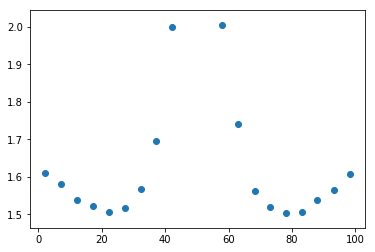

In [110]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import sympy as sm
sys.displayhook = sm.pprint


data_points1 = np.array([
    [98.2, 48.25],
    [93.2, 46.97],
    [88.0, 46.17],
    [83.2, 45.20],
    [78.0, 45.13],
    [73.0, 45.57],
    [68.2, 46.90],
    [63.1, 52.19],
    [58.0, 60.11]
])


data_points2 = np.array([
    [98.1, 48.32],
    [93.1, 47.39],
    [88.2, 46.17],
    [83.1, 45.64],
    [78.2, 45.16],
    [73.1, 45.48],
    [68.1, 47.06],
    [63.2, 50.86],
    [58.2, 60.00]
])

data_points2[...,0] = 100.4 - data_points2[...,0]
data_points2 = data_points2[::-1]

data_points1[...,1] = data_points1[...,1]/30.00
data_points2[...,1] = data_points2[...,1]/30.00


data_points = np.vstack((data_points1, data_points2))
plt.scatter(data_points[...,0], data_points[...,1])
data_points

In [111]:
coeff1 = np.polyfit(data_points1[...,0], data_points1[...,1], 4)
coeff2 = np.polyfit(data_points2[...,0], data_points2[...,1], 4)

print(coeff1)
print(coeff2)

[ 5.58229134e-07 -1.99843500e-04  2.69306057e-02 -1.61301661e+00
  3.76415759e+01]
[ 9.53073645e-07 -5.55317330e-05  1.24517197e-03 -1.69846774e-02
  1.64688604e+00]


In [112]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` for the ``coeffs`` provided.

    The coefficients must be in desending order (``x**o``...``x**0``)
    """
    o = len(coeffs)
    coeffs = coeffs[::-1]
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

In [113]:
PolyCoefficients(data_points1[...,0], coeff1)
x1 = np.linspace(data_points1[0,0], data_points1[-1:,0])
x2 = np.linspace(data_points2[0,0], data_points2[-1:,0])

In [116]:
x= sm.Symbol('x')
y= sm.Symbol('y')
f1 = PolyCoefficients(x, coeff1)
f2 = PolyCoefficients(x, coeff2)
print("f1 = ", f1)
print()
isect1 = sm.solve(f1 - 1.53, x)[:2]
print(isect1, '\n\n')

print("f2 = ", f2)
print()
isect2 = sm.solve(f2 - 1.53, x)[:2]
print(isect2, '\n\n')

f1 =  5.58229133990043e-7*x**4 - 0.00019984349955394*x**3 + 0.0269306056551367*x**2 - 1.61301660706959*x + 37.6415758764268

[71.3421824344919, 86.9715230449037] 


f2 =  9.53073645285598e-7*x**4 - 5.55317329531201e-5*x**3 + 0.00124517197024031*x**2 - 0.0169846773572684*x + 1.64688604305746

[15.7365571264276, 29.9404690291774] 




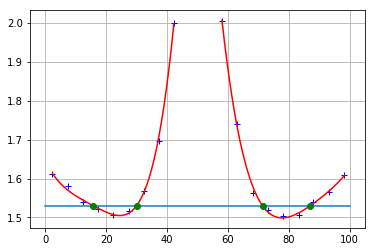

In [122]:
def lineeqn(xo):
    return line[0]*xo + line[1]

plt.plot(data_points[...,0], data_points[...,1], 'b+')
plt.plot(x1, PolyCoefficients(x1, coeff1), 'r')
plt.plot(x2, PolyCoefficients(x2, coeff2), 'r')
plt.plot([0, 100], [1.53]*2)
plt.plot(isect1+isect2, [1.53]*4, 'og')
plt.grid()
plt.show()